In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import datetime as dt

In [2]:
#Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('../Finaldataset-Cleaned.csv')

In [4]:
data.shape

(12000, 24)

In [5]:
data.dtypes

Unnamed: 0                         int64
Employee Code                      int64
Employee_Name                     object
Interim Manager                   object
Band                              object
Department                        object
Designation                       object
Process                           object
Education Field                   object
Gender                            object
Age                                int64
Salary                            object
Rating                            object
Happiness index                    int64
Distance from current Address      int64
Attrition Status                  object
Date Of Joining                   object
Date of Attrition                 object
LWD                               object
Exit interview comments - HR      object
Over18                            object
Stock Option Level               float64
Direct Report                     object
Marital Status                     int64
dtype: object

In [6]:
data = data.drop(['Employee Code','Employee_Name','Interim Manager','Band','Designation','Process','Education Field','Gender'],axis=1)
data = data.drop(['Department','Date Of Joining','Date of Attrition','LWD','Exit interview comments - HR','Direct Report'],axis=1)
data = data.drop(['Unnamed: 0'],axis=1)
data['Stock Option Level'] = data['Stock Option Level'].fillna(0)

In [7]:
data.head()

,Age,Salary,Rating,Happiness index,Distance from current Address,Attrition Status,Over18,Stock Option Level,Marital Status
0,23,Good,C,3,3,No,Y,0.0,0
1,45,Good,B,1,2,Yes,Y,0.0,1
2,37,Good,B,3,4,No,Y,0.0,1
3,28,Fair,C,1,1,Yes,Y,0.0,1
4,30,Good,A,2,3,Yes,Y,0.0,1


In [8]:
data['Salary'].unique()
di = {"Good": 2,"Fair":1,"High":3,"Very High":4}
data = data.replace("Fair",1)
data = data.replace("Good",2)
data = data.replace("High",3)
data = data.replace("Very High",4)

In [9]:
data['Rating'].unique()
di = {"C": 2,"D":1,"B":3,"A":4}
data = data.replace({'Rating':di})

In [10]:
di = {"No":0,"Yes":1}
data = data.replace({'Attrition Status':di})

In [11]:
data['Over18'].unique()
data = data.replace('Y',1)

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,data.columns!='Attrition Status']  #independent columns
y = data['Attrition Status']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 10 best features

                           Specs        Score
3                Happiness index  4100.940824
4  Distance from current Address   271.128411
1                         Salary    99.734635


[3.03582311e-02 1.92389600e-02 8.10781279e-03 9.01233239e-01
 3.92108736e-02 0.00000000e+00 5.39095416e-04 1.31178822e-03]


C:\Users\USER\Anaconda3.1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



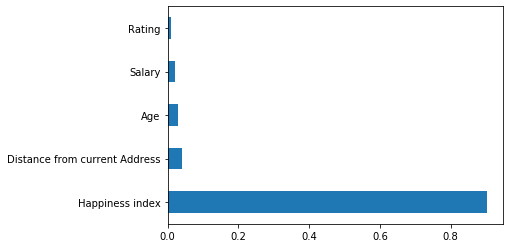

In [13]:
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

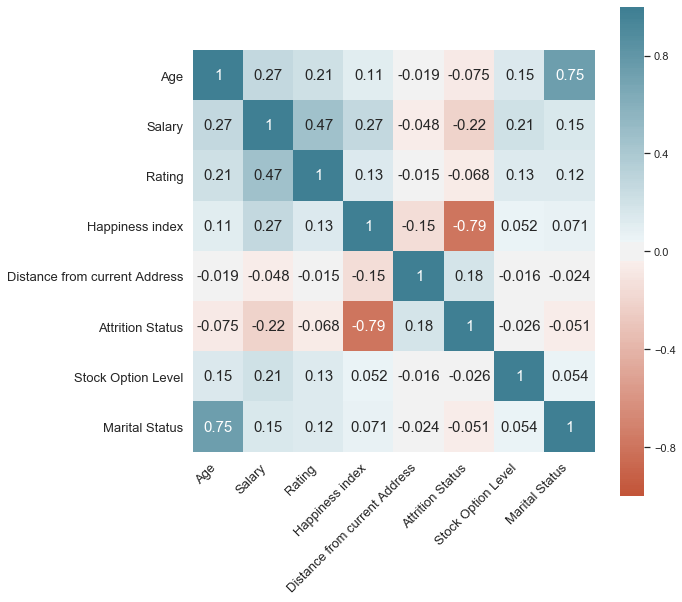

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.figure(figsize=(9,9))
data = data.drop(['Over18'],axis=1)
sns.set(font_scale=1.4)
corr = data.corr()
sns.set(font_scale=1) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #cmap="Blues",
    square=True,
    annot=True,
    annot_kws={"size": 15}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=13
);
ax.set_yticklabels(
    ax.get_xticklabels(),
    fontsize=13
);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig("Heatmap.png", format="png",dpi=400,bbox_inches='tight')

C:\Users\USER\Anaconda3.1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



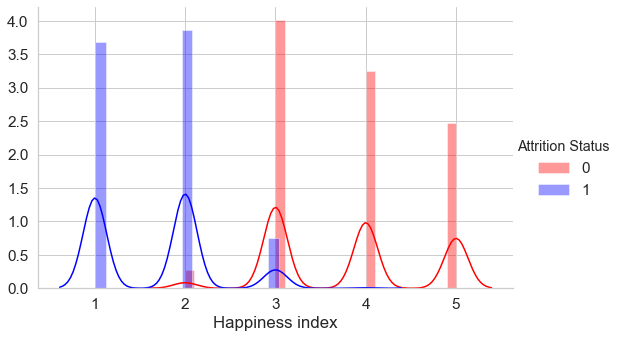

<Figure size 432x288 with 0 Axes>

In [15]:
sns.set(font_scale=1.4)
colors=['Red','Blue']
sns.set_palette(colors)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.FacetGrid(data, hue="Attrition Status", size=5,aspect=1.5) \
   .map(sns.distplot, "Happiness index") \
   .add_legend();
plt.show();
plt.savefig("HIPDF.png")

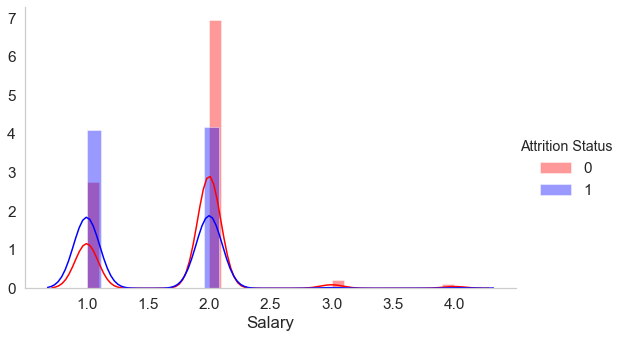

<Figure size 432x288 with 0 Axes>

In [16]:
sns.set(font_scale=1.4)
colors=['Red','Blue']
sns.set_palette(colors)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.FacetGrid(data, hue="Attrition Status", size=5,aspect=1.5) \
   .map(sns.distplot, "Salary") \
   .add_legend();
plt.show();
plt.savefig("HIPDFSalary.png")

In [17]:
data = pd.read_csv('../Finaldataset-Cleaned.csv')

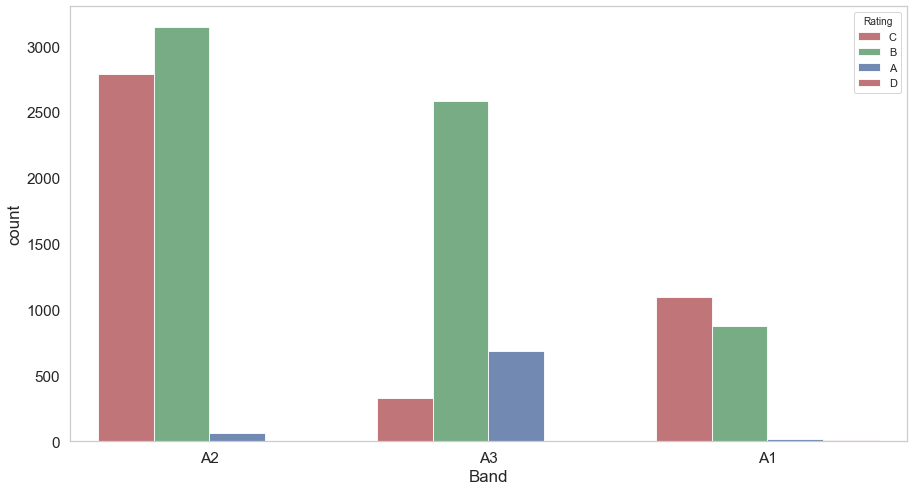

In [18]:
data_lower = data[data['Band']!='Manager']
data_lower = data_lower[data_lower['Band']!='P1']
data_lower = data_lower[data_lower['Band']!='P2']
plt.subplots(figsize=(15,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(x='Band',hue='Rating',  data=data_lower,alpha=0.85,palette=['r','g','b'])
plt.show()

In [19]:
#Configuration
A1 = data[data['Band']=='A1']
A2 = data[data['Band']=='A2']
A3 = data[data['Band']=='A3']
Manager = data[data['Band']=='Manager']
P1 = data[data['Band']=='P1']
P2 = data[data['Band']=='P2']

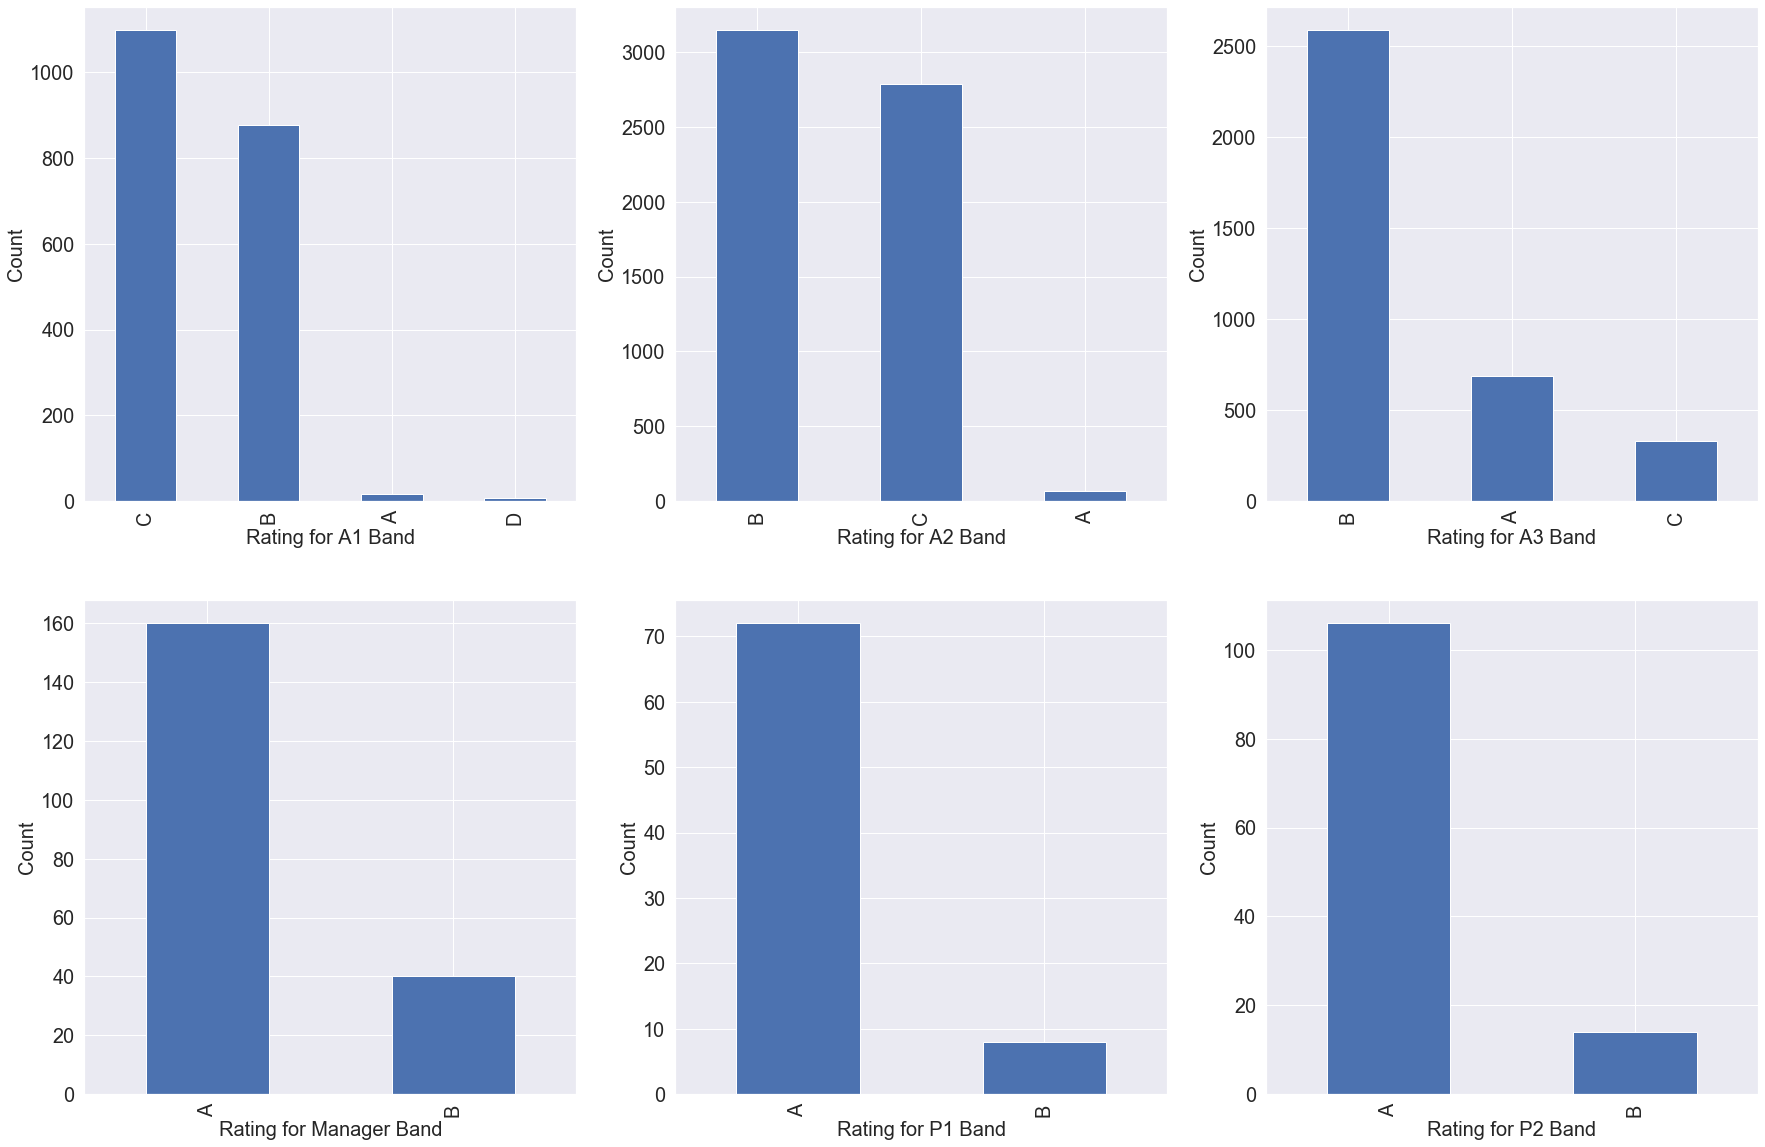

In [20]:
sns.set(font_scale=1.8)
plt.subplots(figsize=(30,20)) 
plt.subplot(2,3,1)
A1['Rating'].describe()
A1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,2)
A2['Rating'].describe()
A2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,3)
A3['Rating'].describe()
A3['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A3 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,4)
Manager['Rating'].describe()
Manager['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for Manager Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,5)
P1['Rating'].describe()
P1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,6)
P2['Rating'].describe()
P2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.savefig("RatingComparision.png")

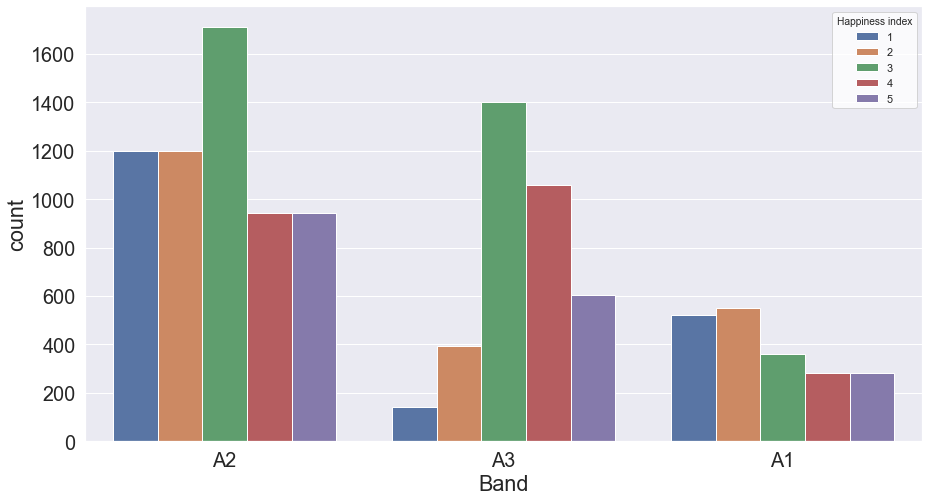

In [21]:
plt.subplots(figsize=(15,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(x='Band',hue='Happiness index',  data=data_lower)
plt.show()

In [22]:
data_higher=data[data['Band']!='A1']
data_higher=data_higher[data_higher['Band']!='A2']
data_higher=data_higher[data_higher['Band']!='A3']


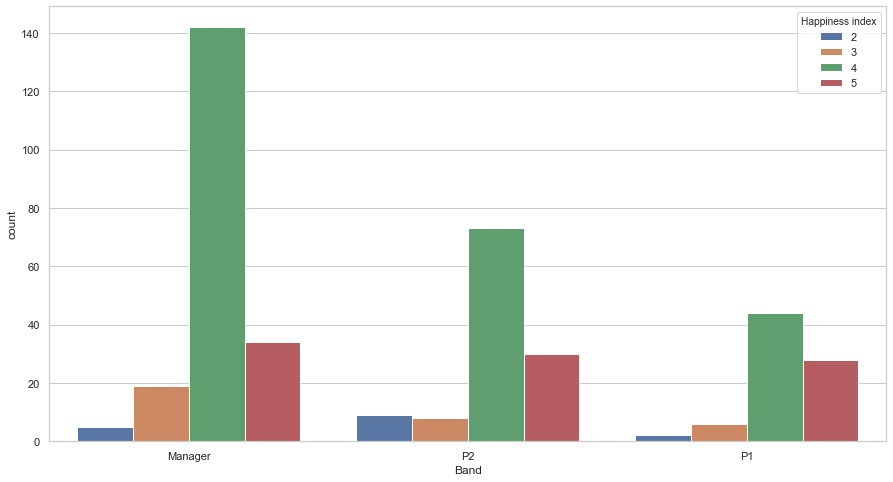

In [23]:
plt.subplots(figsize=(15,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(x='Band',hue='Happiness index',  data=data_higher)
plt.show()

In [24]:
band_happiness=data.groupby("Band")['Happiness index'].describe()
band_happiness

,count,mean,std,min,25%,50%,75%,max
Band,,,,,,,,
A1,2000.0,2.630500,1.374742,1.0,1.0,2.0,4.00,5.0
A2,6000.0,2.872833,1.330773,1.0,2.0,3.0,4.00,5.0
A3,3600.0,3.441111,1.018244,1.0,3.0,3.0,4.00,5.0
Manager,200.0,4.025000,0.605150,2.0,4.0,4.0,4.00,5.0
P1,80.0,4.225000,0.693094,2.0,4.0,4.0,5.00,5.0
P2,120.0,4.033333,0.787863,2.0,4.0,4.0,4.25,5.0


In [25]:
band_rating=data.groupby("Band")['Rating'].describe()
band_rating

,count,unique,top,freq
Band,,,,
A1,2000,4,C,1098
A2,6000,3,B,3146
A3,3600,3,B,2584
Manager,200,2,A,160
P1,80,2,A,72
P2,120,2,A,106


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

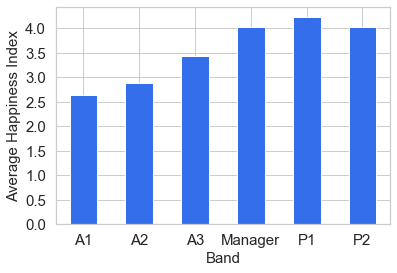

In [26]:
#plt.rcParams.update({'font.size': 30})
band_happiness['mean'].plot(kind='bar',grid=True,fontsize=15,color='#346eeb',alpha=1)
plt.xlabel('Band', fontsize=15)
plt.ylabel('Average Happiness Index', fontsize=15)
#plt.axhline(y=3, label='Higher level Bands'.format(3), c='g')
#plt.legend(loc="upper left")
plt.xticks(rotation=0)

In [27]:
interim_manager=data.groupby("Interim Manager")['Attrition Status'].describe()
#interim_manager = interim_manager.sort_values(by = 'count', ascending=False)
interim_manager['Attrition Rate']=""
interim_manager.head(5)

,count,unique,top,freq,Attrition Rate
Interim Manager,,,,,
Adam Leyva,207,2,No,151,
Aileen Palmiter,151,2,No,137,
Ann Hoffman,146,2,No,124,
Barbara Medel,151,2,No,140,
Barbara Towell,161,2,No,153,


In [28]:
for i in range(len(interim_manager)):
    if interim_manager['top'][i] == 'Yes':
        interim_manager['Attrition Rate'][i] = interim_manager['freq'][i]/interim_manager['count'][i]
    else:
        interim_manager['Attrition Rate'][i] = (interim_manager['count'][i]-interim_manager['freq'][i])/interim_manager['count'][i]

In [29]:
interim_manager['Attrition Rate'] = pd.to_numeric(interim_manager['Attrition Rate'])

In [30]:
interim_manager = interim_manager.sort_values(by = 'Attrition Rate', ascending=False)
interim_manager['Name']=""
interim_manager['Name']=interim_manager.index.tolist()

In [31]:
interim_manager.head()

,count,unique,top,freq,Attrition Rate,Name
Interim Manager,,,,,,
Steven Lane,438,2,Yes,301,0.687215,Steven Lane
Joanne Nelson,377,2,Yes,251,0.665782,Joanne Nelson
Han Nichols,371,2,Yes,231,0.622642,Han Nichols
Stella Mckoy,394,2,Yes,243,0.616751,Stella Mckoy
Julius Wright,342,2,Yes,194,0.567251,Julius Wright


In [32]:
for i in interim_manager['Name'].head(5):
    count = 0
    total_happiness = 0
    for j in range(len(data)):
        if data['Interim Manager'][j] == i:
            total_happiness = total_happiness + data['Happiness index'][j]
            count = count + 1
    print(total_happiness/count)
            
            

2.3447488584474887
2.3474801061007957
2.404312668463612
2.3807106598984773
2.5964912280701755


In [1]:
#interim_manager['Average Happiness Index'][0] = 2.34
#interim_manager['Average Happiness Index'][1] = 2.34
#interim_manager['Average Happiness Index'][2] = 2.40
#interim_manager['Average Happiness Index'][3] = 2.38
#interim_manager['Average Happiness Index'][4] = 2.59

In [2]:
#all_5 = []
#for i in interim_manager['Name'].head(5):
#    total_rating = []
#    for j in range(len(data)):
#        if data['Interim Manager'][j] == i:
#            total_salary.append(data['Rating'][j])
#    all_5.append(total_rating)
            

In [115]:
dic = {1:10, 2:20, 3:'foo'}
numeric_salaries = {'A':2,'B':2,'C':1,'D':-1}
for i in range(len(all_5)):
    all_5[i] = [numeric_salaries.get(n, n) for n in all_5[i]]

In [3]:
#from statistics import mean 
#for i in range(len(all_5)):
#    all_5[i] = mean(all_5[i])

In [80]:
all_5

[1.591324200913242,
 1.5543766578249336,
 1.6037735849056605,
 1.5253807106598984,
 1.6023391812865497]

In [ ]:
interim_manager['Rating'] = ''

In [ ]:
data.groupby()
    

In [32]:
print(len(data[data['Attrition Status']=='Yes'])/len(data))

0.35


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 <a list of 10 Text yticklabel objects>)

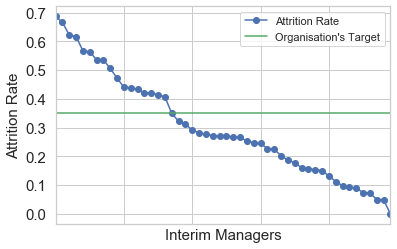

In [33]:
#plt.plot(figsize(10,20))
interim_manager['Attrition Rate'].plot(kind='line',grid=True,color='b', marker='o')
plt.ylabel('Attrition Rate',fontsize=15)
plt.xlabel('Interim Managers',fontsize=15)
plt.axhline(y=0.35, label="Organisation's Target", c='g')
plt.legend(loc="upper right")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=15)

In [82]:
interim_manager=data.groupby("Interim Manager")['Happiness index'].describe()

In [83]:
interim_manager = interim_manager.sort_values(by='mean',ascending=True)

Text(0, 0.5, 'Happiness Index')

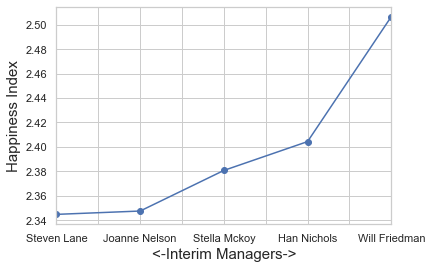

In [104]:
interim_manager['mean'][:5].plot(kind='line',marker='o')
'''plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)'''
plt.xlabel('<-Interim Managers->',fontsize=15)
plt.ylabel('Happiness Index',fontsize=15)

In [37]:
interim_manager=data.groupby("Interim Manager")['Rating'].describe()
#interim_manager = interim_manager.sort_values(by='unique',ascending=False)
interim_manager

,count,unique,top,freq
Interim Manager,,,,
Adam Leyva,207,3,B,118
Aileen Palmiter,151,4,B,78
Ann Hoffman,146,4,B,84
Barbara Medel,151,3,B,85
Barbara Towell,161,3,B,89
Betty Utterback,226,3,B,140
Christine Mcmaster,222,3,B,128
David Vargas,214,3,B,119
Dennis Davis,213,3,B,125


In [38]:
x = pd.read_csv("../Direct Reports - Sheet1.csv")

In [39]:
x.head()

,Sr. No,Manager,Sentimental Analysis
0,1,"Management Priorities, Poorly-trained people m...",Negative
1,2,No career path. Horrible work life balance. Ne...,Negative
2,3,Not a lot of contact with managers,Negative
3,4,"Small desk, crowded offices, non-engaging mana...",Negative
4,5,- Competition is fierce. Everyone is striving ...,Positive


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

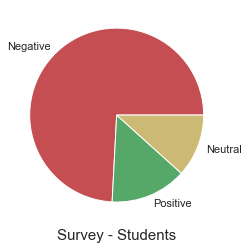

In [40]:
x['Sentimental Analysis'].value_counts().plot(kind='pie',colors=['r','g','y'])
plt.ylabel('')
plt.xlabel('Survey - Students',fontsize=15)
plt.xticks(fontsize=15)

In [41]:
x = pd.read_csv('../NLP - Exit Interview Comments - Sheet1.csv')
x=x.iloc[:,0:2]

In [42]:
x.head()

,Exit interview comments - DR,Comments
0,I have discussed with user and according to hi...,Negative
1,As discussed with the team member he has famil...,Negative
2,Afroz has family concerns where they are searc...,Positive
3,Difficult to retain as he has made up his mind...,Negative
4,He needs to take care of his parents who are s...,Negative


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

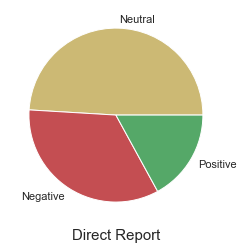

In [43]:
x['Comments'].value_counts().plot(kind='pie',colors=['y','r','g'])
plt.ylabel('')
plt.xlabel('Direct Report',fontsize=15)
plt.xticks(fontsize=15)

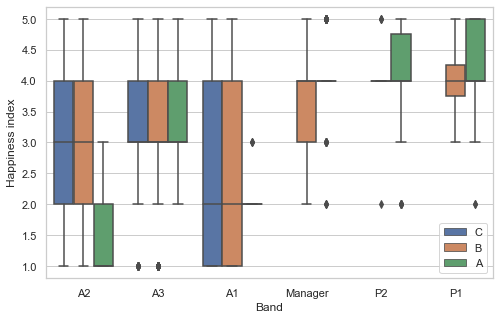

In [44]:
plt.subplots(figsize=(8,5))
sns.boxplot(x='Band',y='Happiness index',hue='Rating', data=data[data['Rating']!='D'])
plt.legend(loc = "lower right")
plt.show()

In [45]:
data = data.sort_values('Rating',ascending=False)
#data = data.sort_values('Rating')

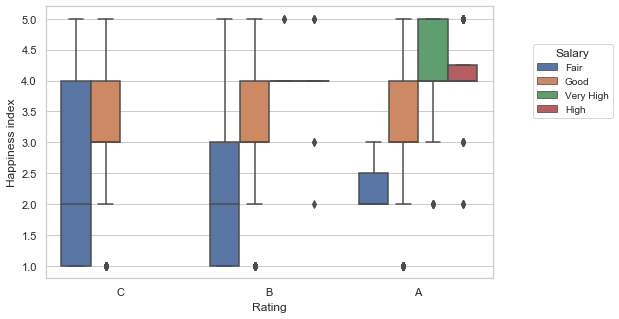

In [46]:
plt.subplots(figsize=(8,5))
sns.boxplot(x='Rating',y='Happiness index',hue='Salary', data=data[data['Rating']!='D'])
plt.legend(loc = "lower right",title='Salary',fontsize='small',bbox_to_anchor=(1.28, 0.57),ncol=1)
plt.show()